In [ ]:
%cd drive/MyDrive/ams_595_python_teaching

[Errno 2] No such file or directory: 'drive/MyDrive/ams_595_python_teaching # change the path'
/content


In [ ]:
!pwd

/content


The dataset used in this lecture is from the Coursera online course Deep Learning Specialization taught by Andrew Ng.

https://www.deeplearning.ai/courses/deep-learning-specialization/

### Loading Data

In [ ]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

train_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/train_catvnoncat.h5', "r")  # change the path
test_dataset = h5py.File('/content/drive/MyDrive/ams_595_python_teaching/dataset/test_catvnoncat.h5', "r")   # change the path

print(train_dataset.keys())
print(train_dataset['train_set_x']) # x: images of shape (64,64, 3), X contains 209 images (features)
print(train_dataset['train_set_y']) # y: corresponding boolean values (labels)
print(train_dataset['list_classes']) # we have two classes

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">
<HDF5 dataset "list_classes": shape (2,), type "|S7">


In [ ]:
train_X = np.array(train_dataset["train_set_x"][:])
train_Y = np.array(train_dataset["train_set_y"][:])
test_X = np.array(test_dataset["test_set_x"][:]) #  test set features
test_Y = np.array(test_dataset["test_set_y"][:]) #  test set labels
classes = np.array(test_dataset["list_classes"][:])
print(train_X.shape)
print(train_Y.shape)
print(classes.shape)
print(classes) # numpy.bytes_
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))
print(train_Y.shape)


(209, 64, 64, 3)
(209,)
(2,)
[b'non-cat' b'cat']
(1, 209)


1. train_X (209, 64, 64, 3): 209 training iamges, 64 by 64 resolution, three channels RGB.
2. train_Y (1, 209): corresponding labels
3. classes (2,): ASCII codes of classfications "cat" and "non-cat"
4. test_X, test_Y: 50 testing images

### Visualize images in the data set

Some images in the training set

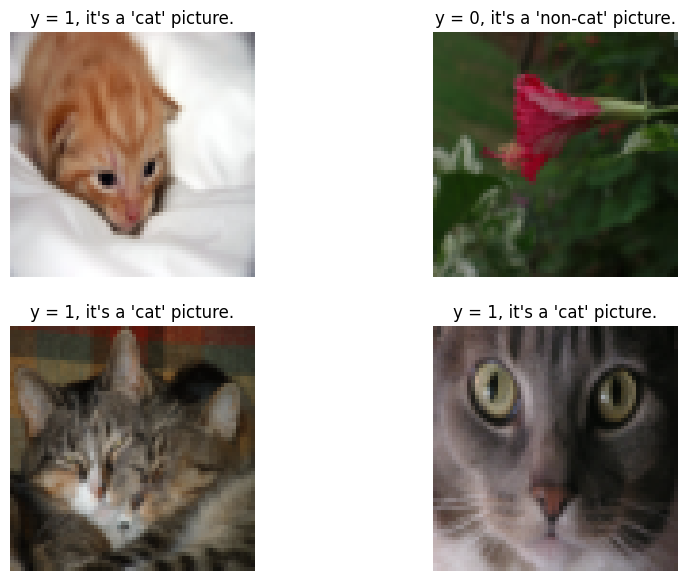

In [ ]:
# the indices of images that we want to look at
indices = [57, 58, 59, 60]

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

for i in indices:
  fig.add_subplot(rows, columns, i - 56) # i - 56 is the subplot indices, 1,2,3,4
  plt.imshow(train_X[i])
  plt.axis('off')
  plt.title("y = " + str(train_Y[0, i]) + ", it's a '" + classes[np.squeeze(train_Y[:, i])].decode("utf-8") +  "' picture.")

Some images in the testing set

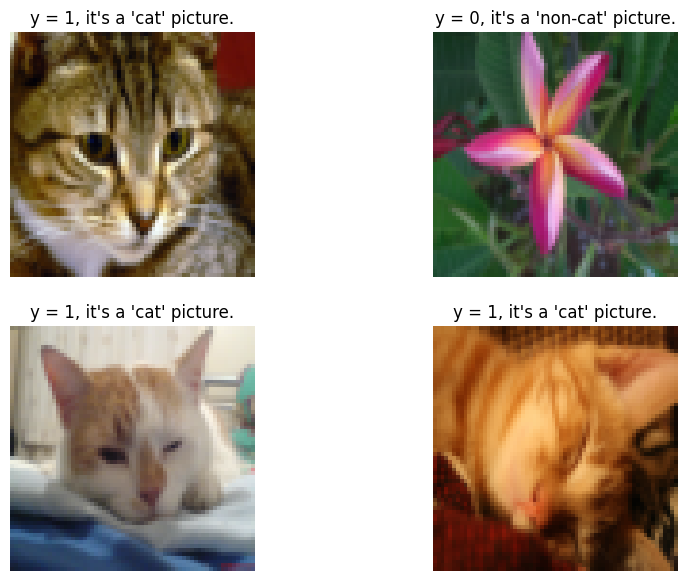

In [ ]:
# the indices of images that we want to look at
indices = [15, 16, 17, 18]

# create figure
fig = plt.figure(figsize=(10, 7))

# setting values to rows and column variables
rows = 2
columns = 2

for i in indices:
  fig.add_subplot(rows, columns, i - 14) # i - 54 is the subplot indices, 1,2,3,4
  plt.imshow(test_X[i])
  plt.axis('off')
  plt.title("y = " + str(test_Y[0, i]) + ", it's a '" + classes[np.squeeze(test_Y[:, i])].decode("utf-8") +  "' picture.")

### "Flatten" and normalize the images


Target flat shape:

*   (64 * 64 * 3, m)




In [ ]:
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T  # flatten the image to have a vector, normalize to prevent the calculations from exploding
print(train_X_flat.shape)
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

(12288, 209)


### Helper Functions

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return: sigmoid(z)
    """
    return 1/(1+np.exp(-z))

In [ ]:
def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    cost -- negative log-likelihood cost for logistic regression
    """

    m = X.shape[1]

    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum(((- np.log(A))*Y + (-np.log(1-A))*(1-Y)))/m  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    cost = np.squeeze(cost)

    return dw, db, cost

## Training

In [ ]:
X = train_X_flat
Y = train_Y
dim = train_X_flat.shape[0]
w = np.zeros((dim,1)) # initialize w, shape (dim, 1)
b = 0 # initialize b, scalar
num_iterations = 10000
learning_rate = 0.006
record_cost = 50  # print out the cost every 50 iterations
costs = []

for i in range(num_iterations):
    dw, db, cost = propagate(w, b, X, Y)


    # gradient descent
    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

    # Record the costs
    if i % record_cost == 0:
        costs.append(cost)
        print (f"Cost after iteration {i} is: {cost}")

scipy.io.savemat("weights.mat", {"weights":w})
scipy.io.savemat("biases.mat", {"biases":b})

Cost after iteration 0 is: 0.6931471805599453
Cost after iteration 50 is: 0.7281013187730965
Cost after iteration 100 is: 0.6498112732446272
Cost after iteration 150 is: 0.5919060823227436
Cost after iteration 200 is: 0.5383118237783535
Cost after iteration 250 is: 0.48758205286415945
Cost after iteration 300 is: 0.43926169478897475
Cost after iteration 350 is: 0.3932376486927421
Cost after iteration 400 is: 0.34982476543067453
Cost after iteration 450 is: 0.31024837330927285
Cost after iteration 500 is: 0.27849843579712574
Cost after iteration 550 is: 0.2606010237733837
Cost after iteration 600 is: 0.2497640022987191
Cost after iteration 650 is: 0.240093693258189
Cost after iteration 700 is: 0.23117767283922816
Cost after iteration 750 is: 0.2229155289076535
Cost after iteration 800 is: 0.21522905139235488
Cost after iteration 850 is: 0.20805455724093086
Cost after iteration 900 is: 0.20133887003959525
Cost after iteration 950 is: 0.19503682036924944
Cost after iteration 1000 is: 0.18

## Results

In [ ]:
print(test_X_flat.shape)
w = scipy.io.loadmat('weights.mat')["weights"]
b = scipy.io.loadmat('biases.mat')["biases"]
print(w.shape)
print(b.shape)
A = sigmoid(np.dot(w.T,test_X_flat) + b)
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)

print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")


(12288, 50)
(12288, 1)
(1, 1)
train accuracy: 97.404120
test accuracy: 70.000000
